## 計算300-IOU

取處理前的Mask

In [4]:
import cv2
import os

# 輸入資料夾路徑
input_folder = r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img'

# 輸出資料夾路徑
output_folder = r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output'

# 如果輸出資料夾不存在，則創建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 瀏覽資料夾中的每張圖片
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # 可以根據需要添加其他圖片格式
        # 完整圖片路徑
        img_path = os.path.join(input_folder, filename)
        
        # 讀取圖片
        image = cv2.imread(img_path)
        
        # 檢查是否成功讀取圖片
        if image is None:
            print(f"無法讀取圖片: {filename}")
            continue
        
        # 將圖片轉換為灰度圖
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # 使用Otsu's方法進行二值化處理
        _, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # 保存二值化圖片到輸出資料夾
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, binary_mask)
        print(f"已處理並保存圖片: {output_path}")


已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_251.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_252.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_253.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_254.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_255.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_256.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_257.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_258.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_259.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_260.png


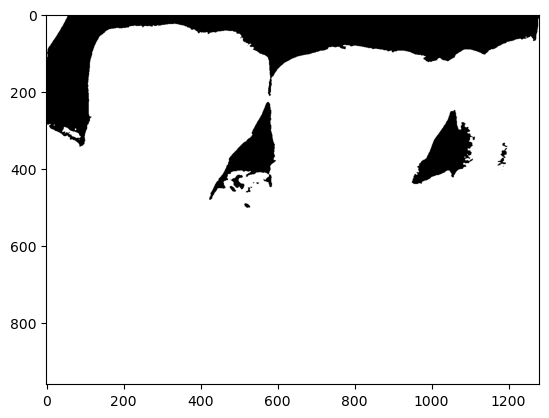

In [5]:
def show_img_by_path(img_path):
    test_img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
show_img_by_path(r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_251.png')

計算處理前的IOU

detect_251.png 與 detect_251.png 的最佳閾值為 85，IoU 為 1.0
detect_252.png 與 detect_252.png 的最佳閾值為 105，IoU 為 0.9985331550110014
detect_253.png 與 detect_253.png 的最佳閾值為 125，IoU 為 0.9953103169872493
detect_254.png 與 detect_254.png 的最佳閾值為 125，IoU 為 0.999055471971618
detect_255.png 與 detect_255.png 的最佳閾值為 160，IoU 為 0.9988294497533727
detect_256.png 與 detect_256.png 的最佳閾值為 130，IoU 為 1.0
detect_257.png 與 detect_257.png 的最佳閾值為 125，IoU 為 0.9994562445691093
detect_258.png 與 detect_258.png 的最佳閾值為 125，IoU 為 0.998546439634381
detect_259.png 與 detect_259.png 的最佳閾值為 135，IoU 為 0.9991776966627225
detect_260.png 與 detect_260.png 的最佳閾值為 110，IoU 為 1.0


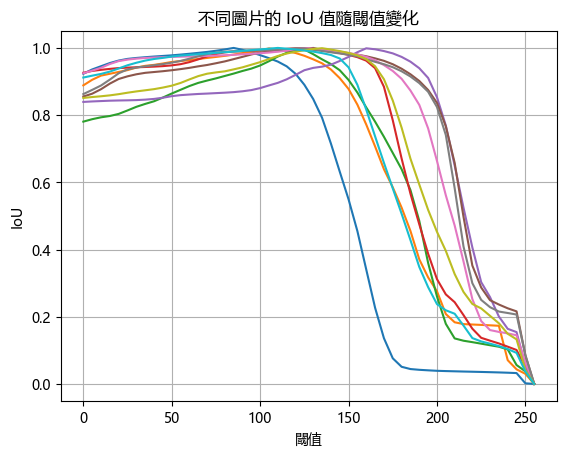

檔案: detect_251.png vs detect_251.png
最佳閾值: 85
最佳 IoU: 1.0

檔案: detect_252.png vs detect_252.png
最佳閾值: 105
最佳 IoU: 0.9985331550110014

檔案: detect_253.png vs detect_253.png
最佳閾值: 125
最佳 IoU: 0.9953103169872493

檔案: detect_254.png vs detect_254.png
最佳閾值: 125
最佳 IoU: 0.999055471971618

檔案: detect_255.png vs detect_255.png
最佳閾值: 160
最佳 IoU: 0.9988294497533727

檔案: detect_256.png vs detect_256.png
最佳閾值: 130
最佳 IoU: 1.0

檔案: detect_257.png vs detect_257.png
最佳閾值: 125
最佳 IoU: 0.9994562445691093

檔案: detect_258.png vs detect_258.png
最佳閾值: 125
最佳 IoU: 0.998546439634381

檔案: detect_259.png vs detect_259.png
最佳閾值: 135
最佳 IoU: 0.9991776966627225

檔案: detect_260.png vs detect_260.png
最佳閾值: 110
最佳 IoU: 1.0

全部圖片的平均 IoU: 0.9988908774589454


In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    ious = []

    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        ious.append((threshold, iou))
        
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou, ious

def process_folder_for_best_thresholds(predict_folder, groundtruth_folder):
    # 自然排序讀取檔案
    predict_files = natsorted([f for f in os.listdir(predict_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    # 檢查檔案數量是否一致
    if len(predict_files) != len(groundtruth_files):
        raise ValueError("預測資料夾和真實資料夾中的檔案數量不一致。")

    best_thresholds = []
    total_iou = 0
    for predict_file, groundtruth_file in zip(predict_files, groundtruth_files):
        predict_path = os.path.join(predict_folder, predict_file)
        groundtruth_path = os.path.join(groundtruth_folder, groundtruth_file)
        
        # 讀取並轉換為灰階影像
        mask_predict = cv2.imread(predict_path, cv2.IMREAD_GRAYSCALE)
        mask_groundtruth = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE)
        
        if mask_predict is None or mask_groundtruth is None:
            print(f"無法讀取檔案: {predict_path} 或 {groundtruth_path}")
            continue
        
        # 計算最佳閾值和 IoU
        best_threshold, best_iou, ious = find_best_threshold(mask_predict, mask_groundtruth)
        best_thresholds.append((predict_file, groundtruth_file, best_threshold, best_iou))
        
        print(f"{predict_file} 與 {groundtruth_file} 的最佳閾值為 {best_threshold}，IoU 為 {best_iou}")

        # 累加 IoU 值
        total_iou += best_iou

        # 畫出每個檔案的 IoU-閾值變化圖
        thresholds = [x[0] for x in ious]
        ious_values = [x[1] for x in ious]
        plt.plot(thresholds, ious_values, label=f"{predict_file}")
    
    # 計算平均 IoU
    average_iou = total_iou / len(best_thresholds) if best_thresholds else 0

    # 顯示所有檔案的 IoU-閾值圖
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 設定中文字體
    plt.xlabel('閾值')
    plt.ylabel('IoU')
    plt.title('不同圖片的 IoU 值隨閾值變化')
    #plt.legend(loc="best")  # 顯示圖例
    plt.grid(True)
    plt.show()

    return best_thresholds, average_iou

# 預測集和真實集的資料夾路徑
predict_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output"
groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img"

# 計算每張圖片的最佳閾值和 IoU，並計算平均 IoU
best_thresholds, average_iou = process_folder_for_best_thresholds(predict_folder, groundtruth_folder)

# 輸出每對檔案的最佳閾值和 IoU
for predict_file, groundtruth_file, best_threshold, best_iou in best_thresholds:
    print(f"檔案: {predict_file} vs {groundtruth_file}")
    print(f"最佳閾值: {best_threshold}")
    print(f"最佳 IoU: {best_iou}\n")

# 輸出全部圖片的平均 IoU
print(f"全部圖片的平均 IoU: {average_iou}")


後處理

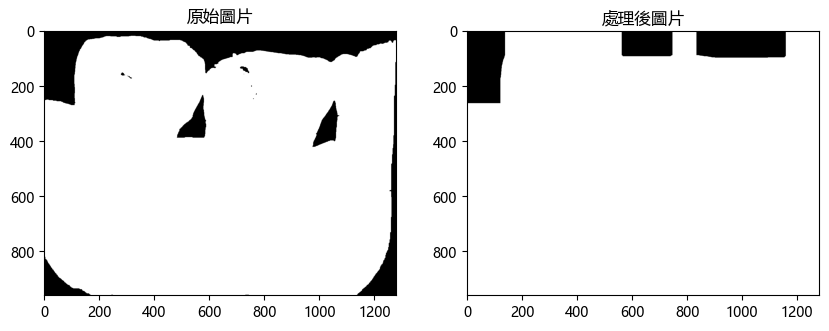

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_1.png


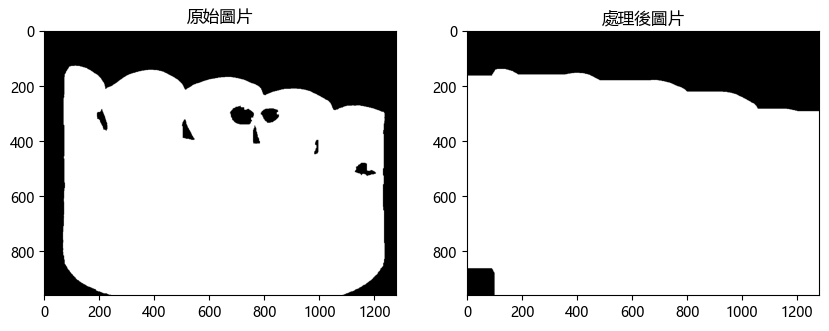

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_2.png


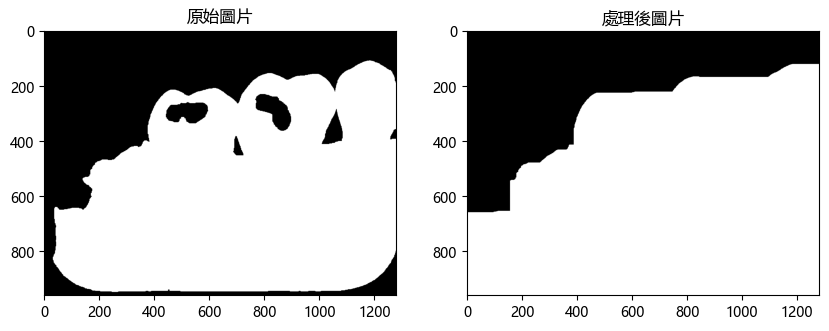

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_3.png


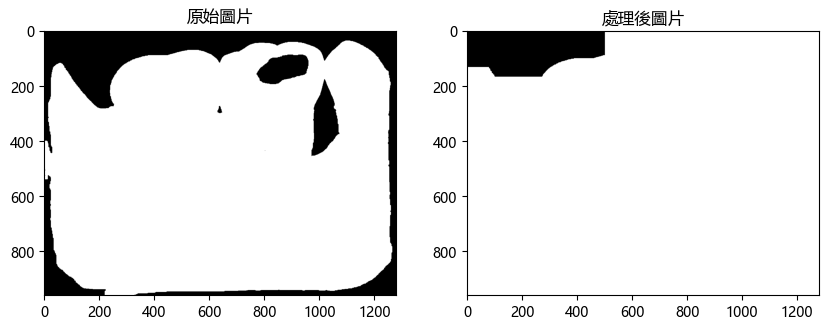

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_4.png


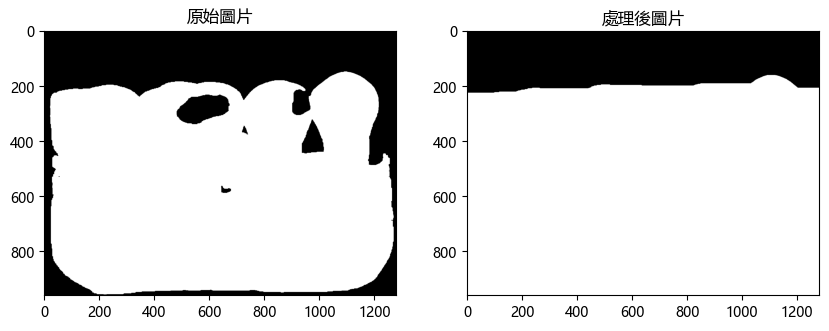

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_5.png


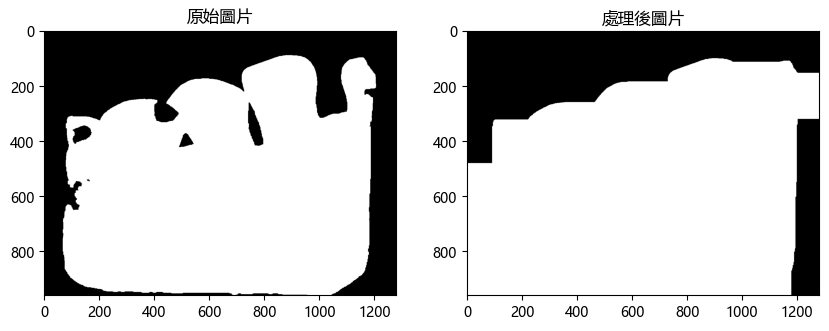

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_6.png


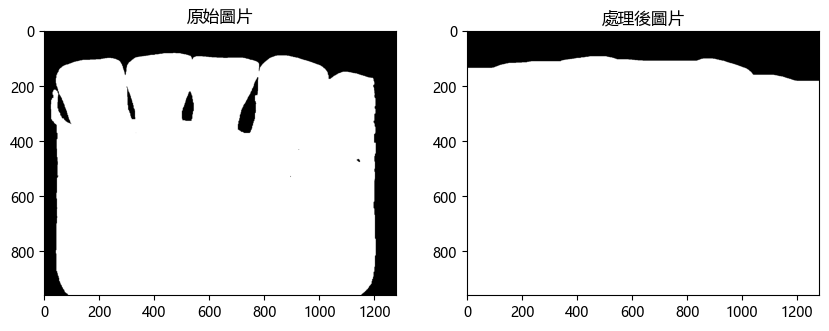

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_7.png


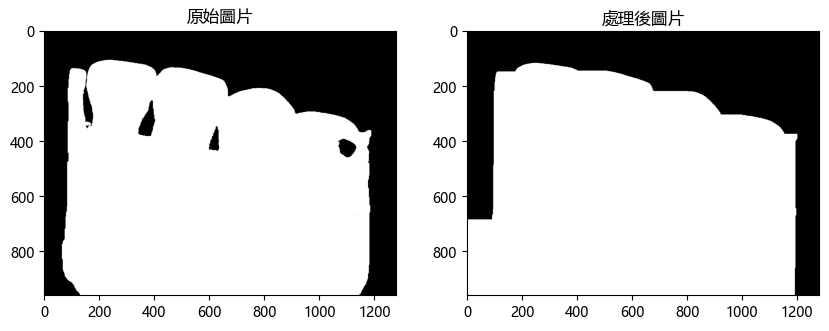

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_8.png


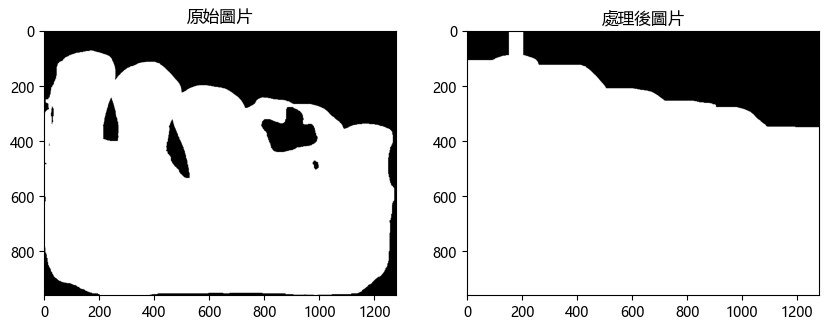

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_9.png


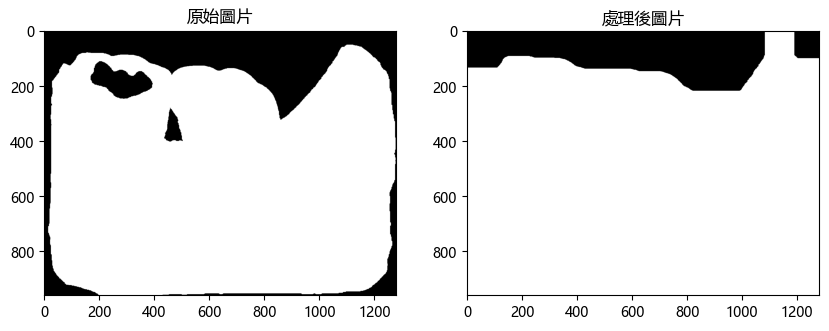

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\predict_10.png
所有圖片處理完成。


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1):
    """
    對單張圖片進行開運算和閉運算處理，以去除噪點並填補孔洞。
    :param image: 原始灰階圖片
    :param kernel_shape: 結構元素的形狀 ('rect', 'ellipse', 'circle')
    :param kernel_size: 閉運算的內核大小，數值越大，閉運算效果越強
    :param iterations: 閉運算的迭代次數
    :return: 經過處理後的圖片
    """
    
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)  # 矩形內核
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))  # 橢圓內核
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))  # 圓形內核
    else:
        raise ValueError("不支持的結構元素形狀")

    # 使用開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 再進行閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    
    return closing

# 資料夾路徑
input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict"
output_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"

# 確認輸出資料夾存在，不存在則創建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 自然排序讀取資料夾中的 PNG 檔案
image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])

# 調整參數 0.833
"""
ellipse     ellipse       ellipse
15              20             20
4                4              5
0.833        0.838          0.844
"""
kernel_shape = 'rect'  # 結構元素形狀 (可調整為 'rect', 'ellipse', 或 'circle') 
kernel_size = 18           # 內核大小 (可調整)  
iterations = 10             # 迭代次數 (可調整)   

# 遍歷資料夾中的每個圖片
for image_file in image_files:
    # 建立完整的輸入和輸出檔案路徑
    input_path = os.path.join(input_folder, image_file)
    output_path = os.path.join(output_folder, image_file)

    # 讀取圖片
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # 檢查是否成功讀取圖片
    if image is None:
        print(f"無法讀取圖片: {image_file}")
        continue

    # 使用參數進行處理
    processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations)

    # 保存處理後的圖片
    cv2.imwrite(output_path, processed_image)

    # 可以選擇顯示處理結果 (若不需要可以注釋掉這段)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('原始圖片')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('處理後圖片')
    plt.imshow(processed_image, cmap='gray')

    plt.show()

    print(f"處理完成並保存至: {output_path}")

print("所有圖片處理完成。")


計算處理後的IOU

predict_1.png 與 detect_251.png 的最佳閾值為 30，IoU 為 0.9476996139749866
predict_2.png 與 detect_252.png 的最佳閾值為 110，IoU 為 0.8892557756244495
predict_3.png 與 detect_253.png 的最佳閾值為 120，IoU 為 0.8421957153587407
predict_4.png 與 detect_254.png 的最佳閾值為 25，IoU 為 0.9413964748682746
predict_5.png 與 detect_255.png 的最佳閾值為 155，IoU 為 0.8498798329844613
predict_6.png 與 detect_256.png 的最佳閾值為 105，IoU 為 0.813761021157649
predict_7.png 與 detect_257.png 的最佳閾值為 60，IoU 為 0.9216489339176743
predict_8.png 與 detect_258.png 的最佳閾值為 90，IoU 為 0.7910796533378452
predict_9.png 與 detect_259.png 的最佳閾值為 135，IoU 為 0.8604486945378226
predict_10.png 與 detect_260.png 的最佳閾值為 45，IoU 為 0.9201299533154567


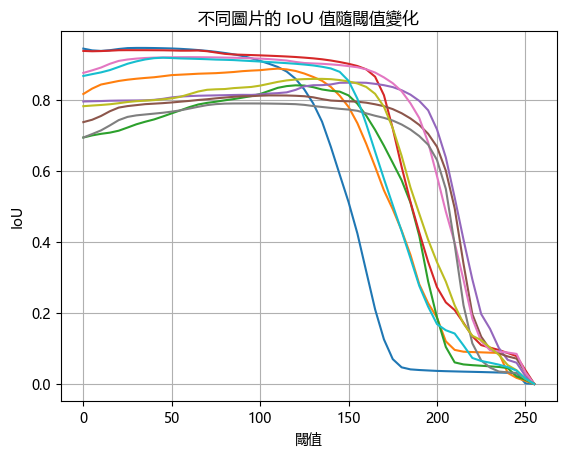

檔案: predict_1.png vs detect_251.png
最佳閾值: 30
最佳 IoU: 0.9476996139749866

檔案: predict_2.png vs detect_252.png
最佳閾值: 110
最佳 IoU: 0.8892557756244495

檔案: predict_3.png vs detect_253.png
最佳閾值: 120
最佳 IoU: 0.8421957153587407

檔案: predict_4.png vs detect_254.png
最佳閾值: 25
最佳 IoU: 0.9413964748682746

檔案: predict_5.png vs detect_255.png
最佳閾值: 155
最佳 IoU: 0.8498798329844613

檔案: predict_6.png vs detect_256.png
最佳閾值: 105
最佳 IoU: 0.813761021157649

檔案: predict_7.png vs detect_257.png
最佳閾值: 60
最佳 IoU: 0.9216489339176743

檔案: predict_8.png vs detect_258.png
最佳閾值: 90
最佳 IoU: 0.7910796533378452

檔案: predict_9.png vs detect_259.png
最佳閾值: 135
最佳 IoU: 0.8604486945378226

檔案: predict_10.png vs detect_260.png
最佳閾值: 45
最佳 IoU: 0.9201299533154567

全部圖片的平均 IoU: 0.8777495669077361


In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    ious = []

    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        ious.append((threshold, iou))
        
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou, ious

def process_folder_for_best_thresholds(predict_folder, groundtruth_folder):
    # 自然排序讀取檔案
    predict_files = natsorted([f for f in os.listdir(predict_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    # 檢查檔案數量是否一致
    if len(predict_files) != len(groundtruth_files):
        raise ValueError("預測資料夾和真實資料夾中的檔案數量不一致。")

    best_thresholds = []
    total_iou = 0
    for predict_file, groundtruth_file in zip(predict_files, groundtruth_files):
        predict_path = os.path.join(predict_folder, predict_file)
        groundtruth_path = os.path.join(groundtruth_folder, groundtruth_file)
        
        # 讀取並轉換為灰階影像
        mask_predict = cv2.imread(predict_path, cv2.IMREAD_GRAYSCALE)
        mask_groundtruth = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE)
        
        if mask_predict is None or mask_groundtruth is None:
            print(f"無法讀取檔案: {predict_path} 或 {groundtruth_path}")
            continue
        
        # 計算最佳閾值和 IoU
        best_threshold, best_iou, ious = find_best_threshold(mask_predict, mask_groundtruth)
        best_thresholds.append((predict_file, groundtruth_file, best_threshold, best_iou))
        
        print(f"{predict_file} 與 {groundtruth_file} 的最佳閾值為 {best_threshold}，IoU 為 {best_iou}")

        # 累加 IoU 值
        total_iou += best_iou

        # 畫出每個檔案的 IoU-閾值變化圖
        thresholds = [x[0] for x in ious]
        ious_values = [x[1] for x in ious]
        plt.plot(thresholds, ious_values, label=f"{predict_file}")
    
    # 計算平均 IoU
    average_iou = total_iou / len(best_thresholds) if best_thresholds else 0

    # 顯示所有檔案的 IoU-閾值圖
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 設定中文字體
    plt.xlabel('閾值')
    plt.ylabel('IoU')
    plt.title('不同圖片的 IoU 值隨閾值變化')
    #plt.legend(loc="best")  # 顯示圖例
    plt.grid(True)
    plt.show()

    return best_thresholds, average_iou

# 預測集和真實集的資料夾路徑
predict_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img"

# 計算每張圖片的最佳閾值和 IoU，並計算平均 IoU
best_thresholds, average_iou = process_folder_for_best_thresholds(predict_folder, groundtruth_folder)

# 輸出每對檔案的最佳閾值和 IoU
for predict_file, groundtruth_file, best_threshold, best_iou in best_thresholds:
    print(f"檔案: {predict_file} vs {groundtruth_file}")
    print(f"最佳閾值: {best_threshold}")
    print(f"最佳 IoU: {best_iou}\n")

# 輸出全部圖片的平均 IoU
print(f"全部圖片的平均 IoU: {average_iou}")
